<a href="https://colab.research.google.com/github/jitendra19/stock-market-prediction/blob/main/Stock_market_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')

plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
# from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [5]:
stockName = 'AAPL'
periodOfData = "max"

# df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
ticker = yf.Ticker(stockName)
df = ticker.history(period=periodOfData, auto_adjust=True)

# Show the data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600,0.0,0.0
1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800,0.0,0.0
1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000,0.0,0.0
1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600,0.0,0.0
1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2022-01-14,171.339996,173.779999,171.089996,173.070007,80355000,0.0,0.0
2022-01-18,171.509995,172.539993,169.410004,169.800003,90956700,0.0,0.0
2022-01-19,170.000000,171.080002,165.940002,166.229996,94815000,0.0,0.0


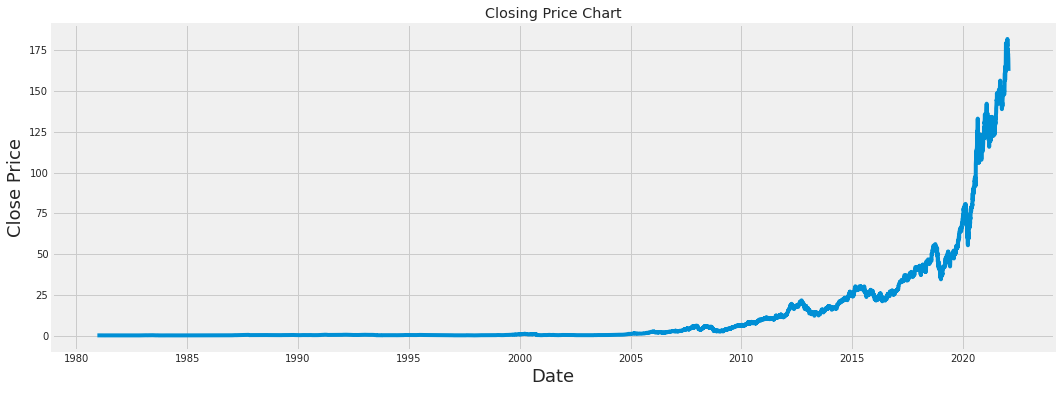

In [6]:
plt.figure(figsize=(16,6))
plt.title('Closing Price Chart')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [7]:
# Create a new dataframe with only the 'Close column 
Close_DF = df.filter(['Close'])
# Convert the dataframe to a numpy array
Close_dataset = Close_DF.values
print(Close_dataset[0])
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(Close_dataset) * .90 ))

print(training_data_len)

[0.10045345]
9330


In [8]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

scaler = MinMaxScaler(feature_range=(0,1))

"""
Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.
The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
We all know that we call fit_transform() method on our training data and transform() method on our test data.
fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. 
we want scaling to be applied to our test data too and at the same time do not want to be biased with our model. 
transform() method we can use the same mean and variance as it is calculated from our training data to transform our test data.
"""

scaled_data = scaler.fit_transform(Close_dataset)

print('fit_transform', scaled_data[0:5])

fit_transform [[0.00034082]
 [0.00031202]
 [0.00027361]
 [0.00028561]
 [0.00030002]]


In [9]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print('x_train --- ', x_train)
        print('y_train --- ', y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

print()
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

x_train ---  [array([0.00034082, 0.00031202, 0.00027361, 0.00028561, 0.00030002,
       0.00033122, 0.00035762, 0.00038162, 0.00041282, 0.00047042,
       0.00048002, 0.00046323, 0.00044403, 0.00045123, 0.00043683,
       0.00040802, 0.00038162, 0.00036962, 0.00040082, 0.00039602,
       0.00037442, 0.00037682, 0.00038882, 0.00038402, 0.00042002,
       0.00040082, 0.00041282, 0.00042002, 0.00041762, 0.00040802,
       0.00040322, 0.00038402, 0.00036242, 0.00033122, 0.00030002,
       0.00031922, 0.00033842, 0.00033842, 0.00034082, 0.00031202,
       0.00031202, 0.00029522, 0.00029041, 0.00027841, 0.00029041,
       0.00031202, 0.00028081, 0.00025441, 0.00026161, 0.00024481,
       0.00027361, 0.00028081, 0.00029762, 0.00030002, 0.00029282,
       0.00028801, 0.00028561, 0.00028081, 0.00024241, 0.00022081])]
y_train ---  [0.0002040104975037326]

x_train ---  [array([0.00034082, 0.00031202, 0.00027361, 0.00028561, 0.00030002,
       0.00033122, 0.00035762, 0.00038162, 0.00041282, 0.0004

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

9270/9270 [==============================] - 270s 29ms/step - loss: 5.7728e-05


In [15]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = Close_dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


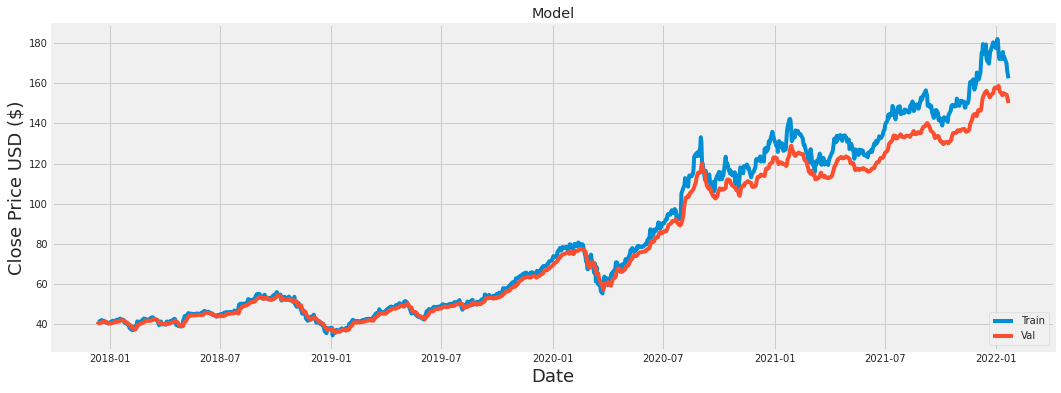

In [13]:
# Plot the data
train = Close_DF[:training_data_len]
valid = Close_DF[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


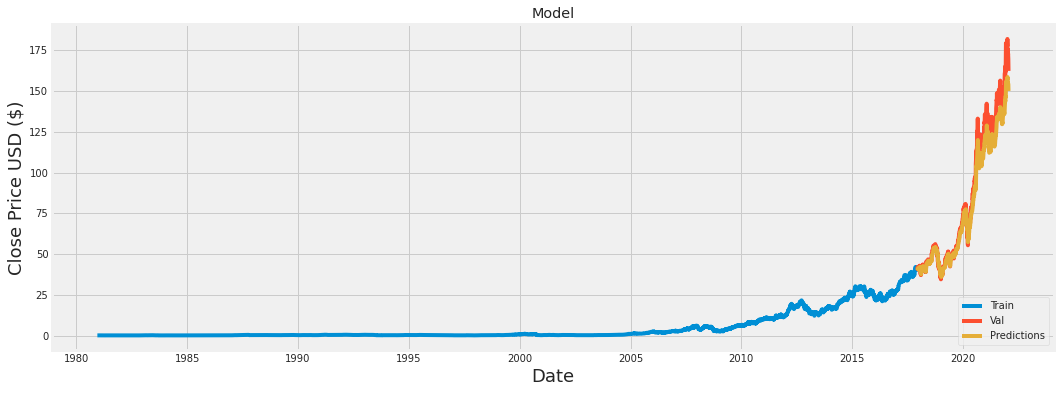

In [12]:
# Plot the data
train = Close_DF[:training_data_len]
valid = Close_DF[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [14]:
valid

,Close,Predictions
Date,,
2017-12-11,41.286201,40.156357
2017-12-12,41.054272,40.406754
2017-12-13,41.190559,40.532726
2017-12-14,41.178596,40.634941
2017-12-15,41.597031,40.690571
...,...,...
2022-01-14,173.070007,154.568329
2022-01-18,169.800003,154.325302
2022-01-19,166.229996,153.343445


In [23]:
from prettytable import PrettyTable
myTable = PrettyTable(["closing price", "Prediction"]) 

for i in range(15):
    # print(forecast[i][0], ' ---> ',svm_prediction[i])
    myTable.add_row([y_test[i][0], predictions[i][0]])

print(myTable)

+--------------------+------------+
|   closing price    | Prediction |
+--------------------+------------+
| 41.28620147705078  | 40.156357  |
| 41.05427169799805  | 40.406754  |
| 41.19055938720703  | 40.532726  |
| 41.17859649658203  |  40.63494  |
| 41.59703063964844  |  40.69057  |
| 42.182838439941406 | 40.856014  |
| 41.73332214355469  |  41.17356  |
| 41.687896728515625 | 41.254124  |
|  41.8457145690918  |  41.25242  |
|  41.8457145690918  |  41.29194  |
| 40.784088134765625 | 41.327175  |
| 40.79125213623047  |  41.00185  |
| 40.90602111816406  | 40.739338  |
| 40.463680267333984 |  40.62275  |
| 41.18815994262695  |  40.4284   |
+--------------------+------------+


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mse = mean_squared_error(y_test, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_test, predictions)
print('MAE: '+str(mae))
# evaluate forecasts
rmse = sqrt(mean_squared_error(y_test, predictions))
print('RMSE: %.3f' % rmse)
mape = np.mean(np.abs(predictions - y_test)/np.abs(y_test))
print('MAPE: '+str(mape))

MSE: 54.16270395886438
MAE: 4.9956890349222425
RMSE: 7.360
MAPE: 0.04602559868825127
